Test accuracy: 0.7232
Test error rate: 0.2768  (~27.68%)


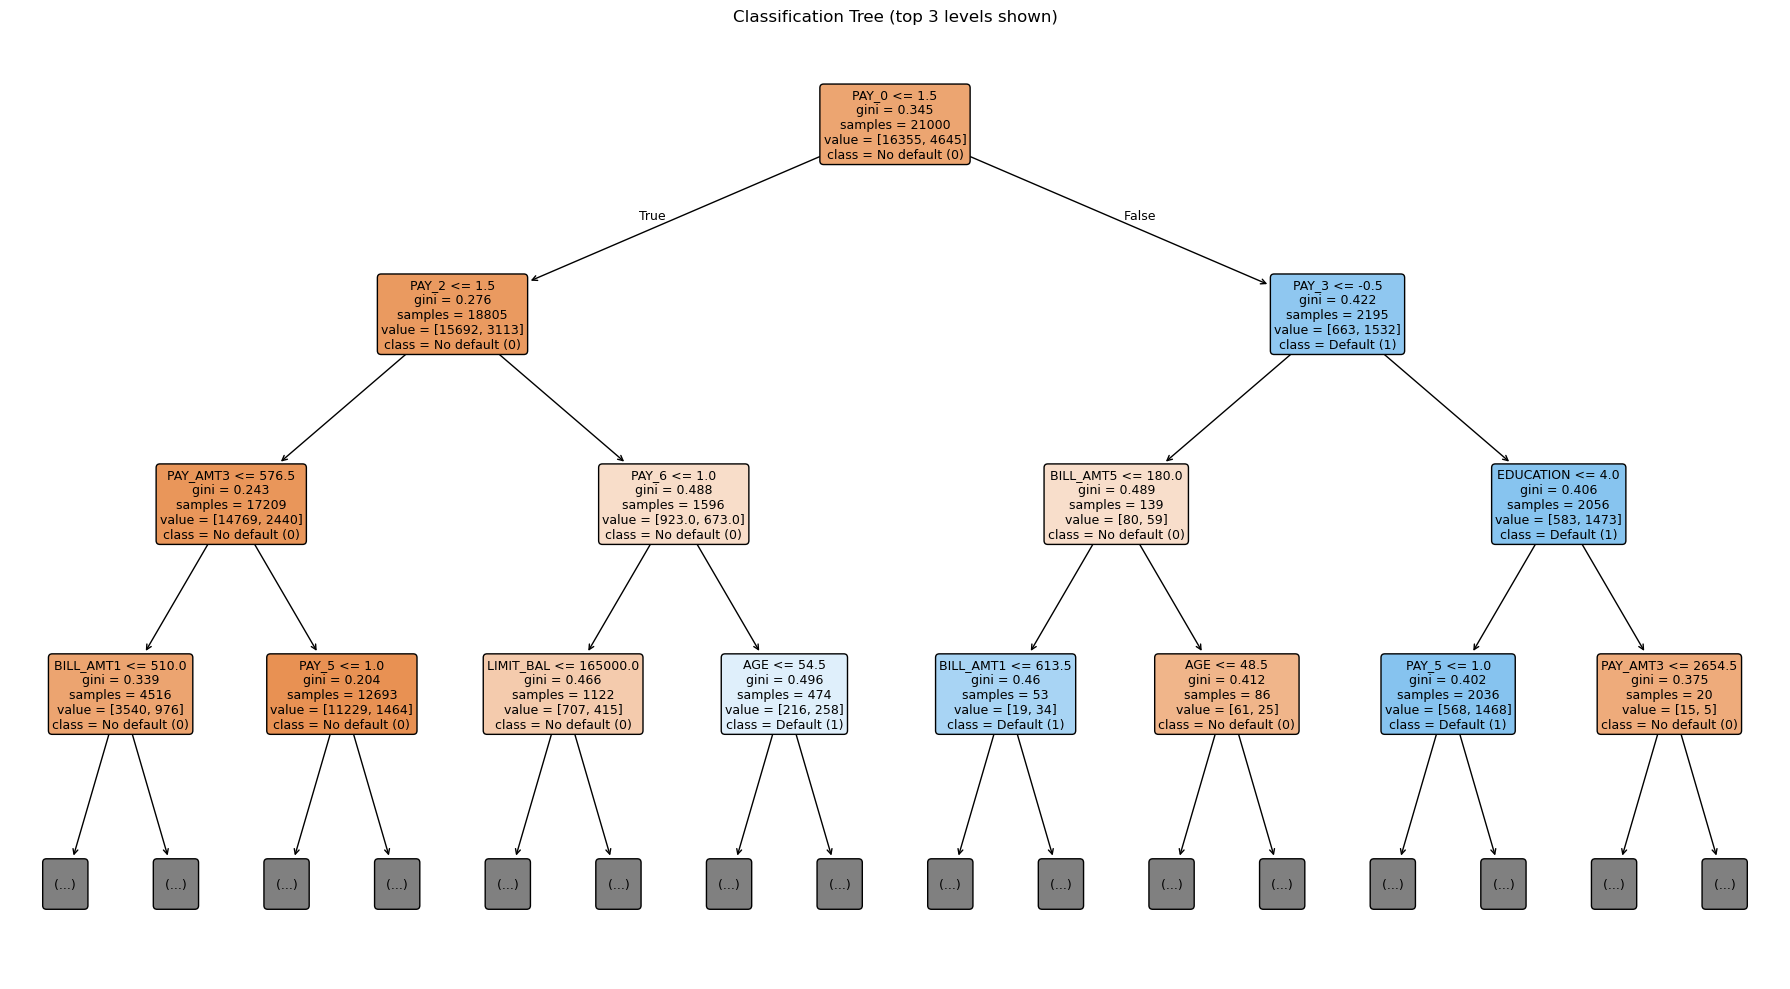

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# -----------------------
# 1) Load the dataset
# -----------------------
path = "default of credit card clients.xls"

# This dataset usually has a title row, then the header row
df = pd.read_excel(path, header=1, engine="xlrd")

target_col = "default payment next month"
X = df.drop(columns=["ID", target_col])
y = df[target_col].astype(int)

# -----------------------
# 2) Train/test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# -----------------------
# 3) Fit classification tree
# -----------------------
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# -----------------------
# 4) Test error rate
# -----------------------
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
test_error = 1 - acc

print(f"Test accuracy: {acc:.4f}")
print(f"Test error rate: {test_error:.4f}  (~{test_error*100:.2f}%)")

# -----------------------
# 5) Plot the tree (top levels for readability)
# -----------------------
plt.figure(figsize=(18, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["No default (0)", "Default (1)"],
    filled=True,
    rounded=True,
    max_depth=3,   # change to None if you want the full tree (very large)
    fontsize=9
)
plt.title("Classification Tree (top 3 levels shown)")
plt.tight_layout()
plt.show()
